<a href="https://colab.research.google.com/github/gracekim247/MNIST-digit-recognition-RF-approach/blob/main/src.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

In [ ]:
# Fetch MNIST dataset (already split into train and test)
(X_train_raw, y_train), (X_test_raw, y_test) = mnist.load_data()
print(f"Size of training dataset: {X_train_raw.shape}")
print(f"Size of testing dataset: {X_test_raw.shape}")

Size of training dataset: (60000, 28, 28)
Size of testing dataset: (10000, 28, 28)


In [ ]:
# Flattening of data (2D grid to 1D vector of 784 values/pixels)
num_train = X_train_raw.shape[0]
num_test = X_test_raw.shape[0]

X_train_flattened = X_train_raw.reshape(num_train, -1)
X_test_flattened = X_test_raw.reshape(num_test, -1)

print(f"New flattened shape: {X_train_flattened.shape}")

New flattened shape: (60000, 784)


In [ ]:
# Normalize (0-255 to 0-1)
X_train_normalized = X_train_flattened / 255.0
X_test_normalized = X_test_flattened / 255.0

In [ ]:
# n_estimators = 100 trees
# max_depth = None = trees grow fully = handle overfitting better
# n_jobs = -1 = parallel processing
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 10-fold cross val
scores = cross_val_score(rf_model, X_train_normalized, y_train, cv=10, n_jobs=-1)
print(f"Cross-val scores: {scores}")

print(f"Mean accuracy: {np.mean(scores):.4f}")

Cross-val scores: [0.971      0.96733333 0.96566667 0.966      0.96466667 0.96683333
 0.96983333 0.96083333 0.9665     0.97716667]
Mean accuracy: 0.9676


In [ ]:
# Training final RF
rf_model.fit(X_train_normalized, y_train)

# Testing on test dataset
y_pred = rf_model.predict(X_test_normalized)

# Overall Accuracy
final_acc = accuracy_score(y_test, y_pred)
print(f"Overall accuracy: {final_acc:.4f}")

Overall accuracy: 0.9704


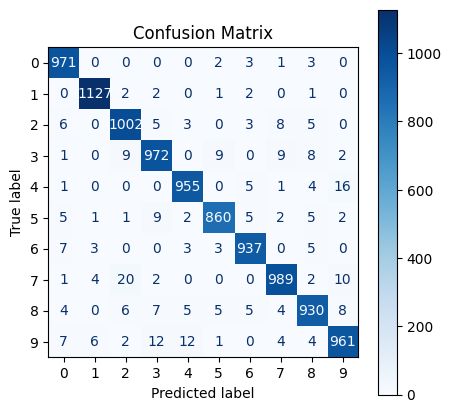

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap='Blues', values_format='d') # remove scientific notation
plt.title(f"Confusion Matrix")
plt.show()

In [ ]:
# Per-class accuracy
per_class_acc = cm.diagonal() / cm.sum(axis=1)
print("\nPer-Class Accuracy:")
for digit, score in enumerate(per_class_acc):
    print(f"Digit {digit}: {score:.4f}")


Per-Class Accuracy:
Digit 0: 0.9908
Digit 1: 0.9930
Digit 2: 0.9709
Digit 3: 0.9624
Digit 4: 0.9725
Digit 5: 0.9641
Digit 6: 0.9781
Digit 7: 0.9621
Digit 8: 0.9548
Digit 9: 0.9524


In [ ]:
# Generate classification report (precision, recall, f1)
report_dict = classification_report(y_test, y_pred, digits=4, output_dict=True)

# Convert to a table
report_df = pd.DataFrame(report_dict).transpose()

# Display the table
print("Summary Table:")
display(report_df)

Summary Table:


,precision,recall,f1-score,support
0,0.968096,0.990816,0.979324,980.0000
1,0.987730,0.992952,0.990334,1135.0000
2,0.961612,0.970930,0.966249,1032.0000
3,0.963330,0.962376,0.962853,1010.0000
4,0.974490,0.972505,0.973496,982.0000
5,0.976163,0.964126,0.970107,892.0000
6,0.976042,0.978079,0.977059,958.0000
7,0.971513,0.962062,0.966764,1028.0000
8,0.961737,0.954825,0.958269,974.0000
9,0.961962,0.952428,0.957171,1009.0000
